# Practice on binary classification metrics

## Confusion Matrix (Binary Classification)

|                | Predicted 1 | Predicted 0 |
|----------------|------------|-------------|
| **Actual 1**   | TP (True Positive) | FN (False Negative) |
| **Actual 0**   | FP (False Positive) | TN (True Negative) |

**TP**: actual 1, predicted 1  
**FP**: actual 0, predicted 1  
**FN**: actual 1, predicted 0  
**TN**: actual 0, predicted 0  

All classification metrics (accuracy, precision, recall, F1, etc.) are derived from these four values.


### Simple example data

In [1]:
import numpy as np

targets =     np.array([1,1,1,1,1,0,0,0,0,0])
predictions = np.array([1,1,1,0,0,0,0,0,0,1])

In [2]:
# sklearn methods
from sklearn.metrics import confusion_matrix, accuracy_score

display(confusion_matrix(targets, predictions, normalize='true'))
display(accuracy_score(targets, predictions))

array([[0.8, 0.2],
       [0.4, 0.6]])

0.7

In [3]:
# same custom methods
from mlpeople.models.logistic import (
    accuracy as accuracy_score_2,
    confusion_matrix as confusion_matrix_2,
    plot_confusion_matrix,
)

display(confusion_matrix_2(targets, predictions, normalize='true', decimals=2))
display(accuracy_score_2(targets, predictions))

{'TP': np.float64(0.6),
 'FN': np.float64(0.4),
 'FP': np.float64(0.2),
 'TN': np.float64(0.8)}

np.float64(0.7)

### Confusion matrix heatmap vizualiztion samples

{'TP': np.int64(3), 'FP': np.int64(1), 'FN': np.int64(2), 'TN': np.int64(4)}

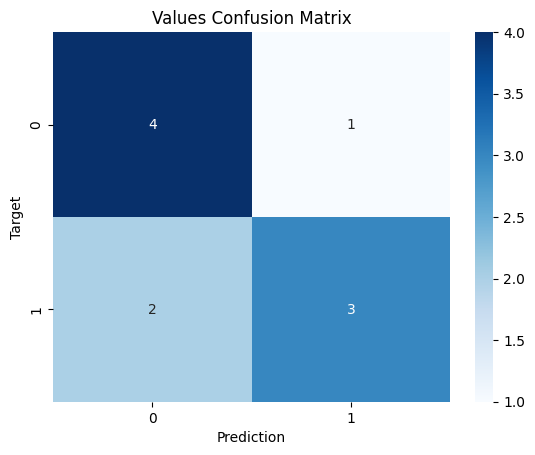

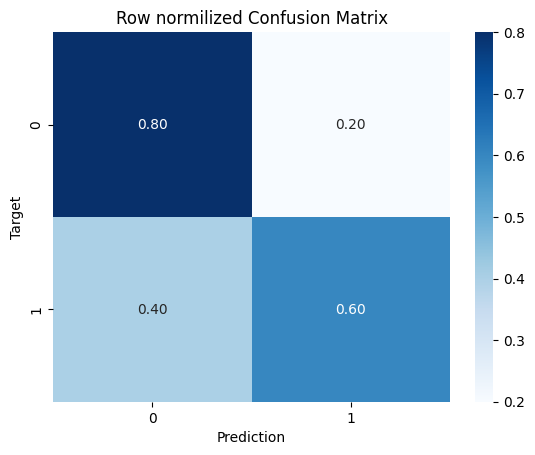

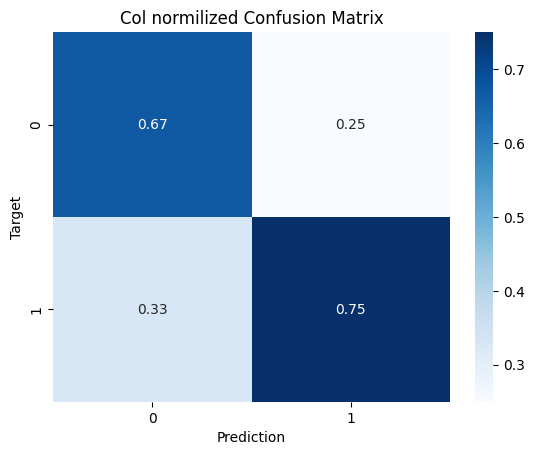

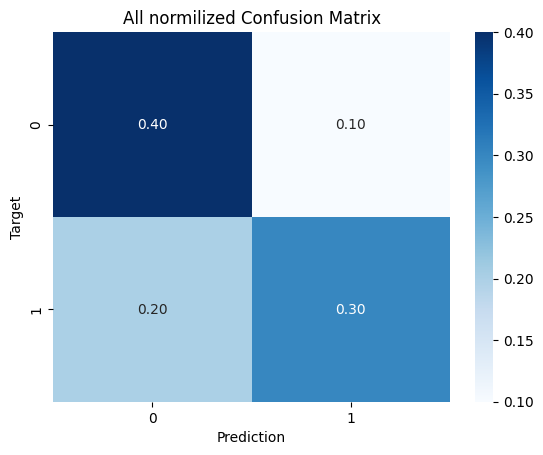

In [4]:
display(confusion_matrix_2(targets, predictions, normalize=None))
plot_confusion_matrix(targets, predictions, normalize=None, name='Values')
plot_confusion_matrix(targets, predictions, normalize='true', name='Row normilized')
plot_confusion_matrix(targets, predictions, normalize='pred', name='Col normilized')
plot_confusion_matrix(targets, predictions, normalize='all', name='All normilized')

### Precision

**Definition:**  
Fraction of positive predictions that are correct.
| True \ Pred | 0 | 1 |
|------------|---|---|
| **0**      | TN | FP |
| **1**      | FN | TP |

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Interpretation:**  
> "When the model predicts positive, how often is it right?"

- **High precision** → few false positives
- **Low precision** → many false positives


In [6]:
from sklearn.metrics import precision_score
from mlpeople.models.logistic import precision

display(precision_score(targets, predictions))
display(precision(targets, predictions).round(2))

0.75

np.float64(0.75)

### Recall (Sensitivity / True Positive Rate)

**Definition:**  
Fraction of actual positives that are correctly identified.
| True \ Pred | 0 | 1 |
|------------|---|---|
| **0**      | TN | FP |
| **1**      | FN | TP |

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Interpretation:**  
> "Of all the actual positives, how many did the model find?"

- **High recall** → few false negatives
- **Low recall** → many false negatives


In [7]:
from sklearn.metrics import recall_score
from mlpeople.models.logistic import recall

display(recall_score(targets, predictions))
display(recall(targets, predictions).round(2))

0.6

np.float64(0.6)

### F1 Score

**Definition:**  
Harmonic mean of precision and recall. Balances false positives and false negatives.

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Interpretation:**  
> "Single metric that is high only if both precision and recall are high"

- **High F1** → model is accurate and finds most positives
- **Low F1** → either many false positives or many false negatives

**Binary confusion matrix reminder:**
| True \ Pred | 0 | 1 |
|------------|---|---|
| **0**      | TN | FP |
| **1**      | FN | TP |


In [10]:
from sklearn.metrics import f1_score
from mlpeople.models.logistic import f1_score as f1_score_2

display(f1_score(targets, predictions))
display(f1_score_2(targets, predictions).round(2))

0.6666666666666666

np.float64(0.67)

### Additional Metrics from Confusion Matrix

**Binary confusion matrix reminder:**

| True \ Pred | 0 | 1 |
|------------|---|---|
| **0**      | TN | FP |
| **1**      | FN | TP |

---

#### True Negative Rate (TNR) / Specificity
Fraction of actual negatives correctly identified.

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- High specificity → few false positives.
- Useful when false alarms are costly (e.g., medical tests).

---

#### False Positive Rate (FPR)
Fraction of actual negatives misclassified as positives.

$$
\text{FPR} = \frac{FP}{FP + TN} = 1 - \text{Specificity}
$$

- Used in ROC curves.

---

#### False Negative Rate (FNR)
Fraction of actual positives misclassified as negatives.

$$
\text{FNR} = \frac{FN}{FN + TP} = 1 - \text{Recall}
$$

- Important when missing positives is costly (e.g., disease detection).

---

#### Balanced Accuracy
Average of sensitivity (recall) and specificity. Useful for imbalanced datasets.

$$
\text{Balanced Accuracy} = \frac{\text{Recall} + \text{Specificity}}{2}
$$

---

#### F-beta Score

**Definition:**  
Generalization of the F1 score that allows weighting recall and precision differently.

$$
F_\beta = (1 + \beta^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}}
$$

**Interpretation:**  
- **β = 1** → F1 score (precision and recall are equally weighted)  
- **β > 1** → recall is more important than precision  
- **β < 1** → precision is more important than recall

**Example:**  

- Precision = 0.8, Recall = 0.5  
- F1 (β=1) = 0.62  
- F2 (β=2) = 0.53 → more weight on recall  
- F0.5 (β=0.5) = 0.71 → more weight on precision


### Few Real World Examples

In [20]:
import numpy as np
from mlpeople.models.logistic.metrics import accuracy, precision, recall, f1_score

# Example 1 — Imbalanced classes
y_true_1 = np.array([1]*10 + [0]*90)       # 10 positives, 90 negatives
y_pred_1 = np.zeros(100)                   # Model predicts all 0

print("Example 1 — Imbalanced classes")
print("Accuracy:", accuracy(y_true_1, y_pred_1))
print("Precision:", precision(y_true_1, y_pred_1))
print("Recall:", recall(y_true_1, y_pred_1))
print("F1:", f1_score(y_true_1, y_pred_1))
print("-"*40)

# Example 2 — False positives matter (spam detection)
y_true_2 = np.array([0]*950 + [1]*50)     # 50 spam, 950 not spam
y_pred_2 = np.array([1]*70 + [0]*900 + [1]*30)   # Model predicts 100 positives, includes 30 of the actual positives - 70 FP from negatives, 30 TP from positives


print("Example 2 — False positives matter (spam detection)")
print("Accuracy:", accuracy(y_true_2, y_pred_2))
print("Precision:", precision(y_true_2, y_pred_2))
print("Recall:", recall(y_true_2, y_pred_2))
print("F1:", f1_score(y_true_2, y_pred_2).round(2))
print("-"*40)

# Example 3 — Rare disease detection
y_true_3 = np.array([0]*9950 + [1]*50)    # 50 patients out of 10000
y_pred_3 = np.array([0]*9900 + [1]*100)   # Model predicts 100 positives, includes all 50 patients

print("Example 3 — Rare disease detection")
print("Accuracy:", accuracy(y_true_3, y_pred_3))
print("Precision:", precision(y_true_3, y_pred_3))
print("Recall:", recall(y_true_3, y_pred_3))
print("F1:", f1_score(y_true_3, y_pred_3).round(2))


Example 1 — Imbalanced classes
Accuracy: 0.9
Precision: 0.0
Recall: 0.0
F1: 0.0
----------------------------------------
Example 2 — False positives matter (spam detection)
Accuracy: 0.91
Precision: 0.3
Recall: 0.6
F1: 0.4
----------------------------------------
Example 3 — Rare disease detection
Accuracy: 0.995
Precision: 0.5
Recall: 1.0
F1: 0.67


## ROU TBD

In [ ]:
# todo